<a href="https://colab.research.google.com/github/nehaa28/JulyTask/blob/main/Part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext tensorboard

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

11493376/11490434 [==============================] - 0s 0us/step


# Observe and document results before and after applying Transfer Learning.

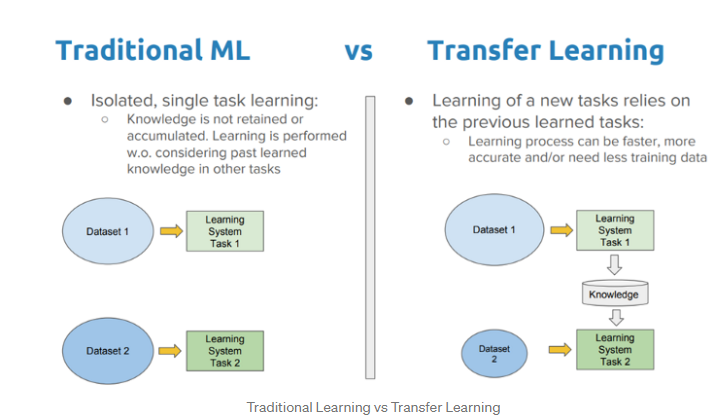

Transfer learning, is having the ability to utilize existing knowledge from the source learner in the target task. During the process of transfer learning, the following three important questions must be answered:
* **What to transfer**: This is the first and the most important step in the whole process. We try to seek answers about which part of the knowledge can be transferred from the source to the target in order to improve the performance of the target task. When trying to answer this question, we try to identify which portion of knowledge is source-specific and what is common between the source and the target.

* **When to transfer**: There can be scenarios where transferring knowledge for the sake of it may make matters worse than improving anything (also known as negative transfer). We should aim at utilizing transfer learning to improve target task performance/results and not degrade them. We need to be careful about when to transfer and when not to.

* **How to transfer**: Once the what and when have been answered, we can proceed towards identifying ways of actually transferring the knowledge across domains/tasks. This involves changes to existing algorithms and different technique.

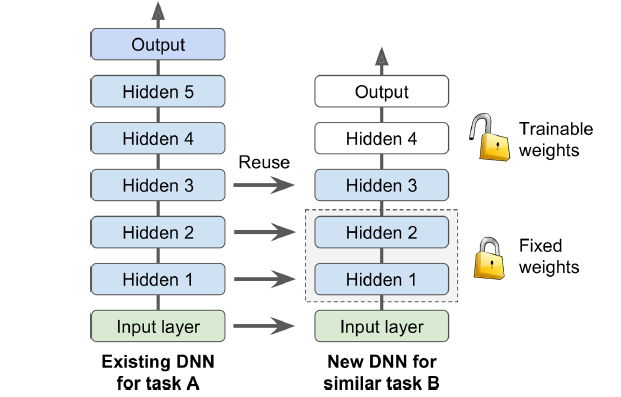



In [3]:
tf.random.set_seed(42)
np.random.seed(42)

model_A = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, kernel_initializer="he_normal"),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dense(100, kernel_initializer="he_normal"),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dense(10, activation="softmax")])

model_A.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

model_A.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
__________________________________________________

In [4]:
history = model_A.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid), verbose=2)

Epoch 1/10
1719/1719 - 4s - loss: 1.5275 - accuracy: 0.5970 - val_loss: 0.9444 - val_accuracy: 0.7980
Epoch 2/10
1719/1719 - 3s - loss: 0.7465 - accuracy: 0.8287 - val_loss: 0.5868 - val_accuracy: 0.8596
Epoch 3/10
1719/1719 - 3s - loss: 0.5412 - accuracy: 0.8624 - val_loss: 0.4685 - val_accuracy: 0.8834
Epoch 4/10
1719/1719 - 3s - loss: 0.4591 - accuracy: 0.8771 - val_loss: 0.4104 - val_accuracy: 0.8940
Epoch 5/10
1719/1719 - 3s - loss: 0.4142 - accuracy: 0.8869 - val_loss: 0.3758 - val_accuracy: 0.9006
Epoch 6/10
1719/1719 - 3s - loss: 0.3851 - accuracy: 0.8938 - val_loss: 0.3525 - val_accuracy: 0.9052
Epoch 7/10
1719/1719 - 3s - loss: 0.3644 - accuracy: 0.8979 - val_loss: 0.3348 - val_accuracy: 0.9102
Epoch 8/10
1719/1719 - 3s - loss: 0.3485 - accuracy: 0.9022 - val_loss: 0.3209 - val_accuracy: 0.9138
Epoch 9/10
1719/1719 - 3s - loss: 0.3356 - accuracy: 0.9053 - val_loss: 0.3111 - val_accuracy: 0.9152
Epoch 10/10
1719/1719 - 3s - loss: 0.3251 - accuracy: 0.9077 - val_loss: 0.3016 - 

In [5]:
model_A.save("pretrained_mnist_1.h5")

In [6]:
pretrained_mnist_model = tf.keras.models.load_model("pretrained_mnist_1.h5")
pretrained_mnist_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
__________________________________________________

In [8]:
model_B_on_A = tf.keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [10]:
model_B_on_A.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 265,701
Trainable params: 265,701
Non-trainable params: 0
________________________________________________

In [13]:
model_B_on_A.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

Note that model_A and model_B_on_A now share some layers. When you train model_B_on_A, it will also affect model_A. If you want to avoid that, you need to clone model_A before you reuse its layers. To do this, you must clone model A’s architecture, then copy its weights (since clone_model() does not clone the weights):

In [14]:
model_A_clone = tf.keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

Now we could just train model_B_on_A for task B, but since the new output layer was initialized randomly, it will make large errors, at least during the first few epochs, so there will be large error gradients that may wreck the reused weights. To avoid this, one approach is to freeze the reused layers during the first few epochs, giving the new layer some time to learn reasonable weights. To do this, simply set every layer’s train able attribute to False and compile the model:

In [15]:
for layer in model_B_on_A.layers[:-1]:
  layer.trainable = False
  model_B_on_A.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])
  #compile your model after you freeze or unfreeze layers.
  

ADVANTAGES:

* Helps solve complex real-world problems with several constraints
* Tackle problems like having little or almost no labeled data availability
* Ease of transfering knowledge from one model to another based on domains and tasks
* Provides a path towards achieving Artificial General Intelligence some day in the future!

# Compare and document different available Optimizers and their derivation. 

Optimizers are algorithms or methods used to change the attributes of the neural network such as weights and learning rate to reduce the losses. Optimizers are used to solve optimization problems by minimizing the function.

How do Optimizers work?

Optimization algorithms are responsible for reducing the losses and to provide the most accurate results possible.
The weight is initialized using some initialization strategies and is updated with each epoch according to the update equation.
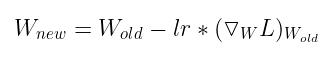

The above equation is the update equation using which weights are updated to reach the most accurate result.

Various optimizers are :

# Gradient Descent (GD):

* Gradient descent is the most basic and first-order optimization algorithm which is dependent on the first-order derivative of a loss function. 
* It calculates which way the weights should be altered so that the function can reach a minimum. 
* Through backpropagation, the loss is transferred from one layer to another and the model’s parameters also known as weights are modified depending on the losses so that the loss can be minimized.

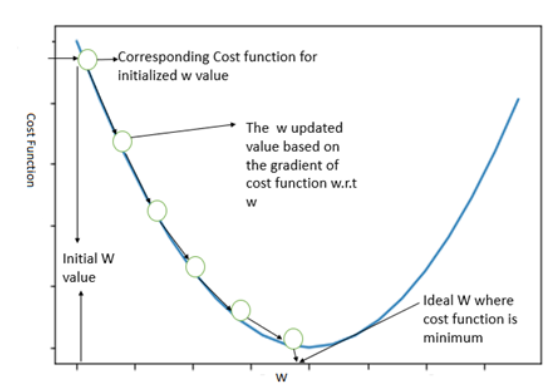

Advantages:
Very simple to implement.

Disadvantages:
This algorithm takes an entire dataset of n-points at a time to compute the derivative to update the weights which require a lot of memory.
Minima is reached after a long time or is never reached. This algorithm can be stuck at local minima or saddle point:

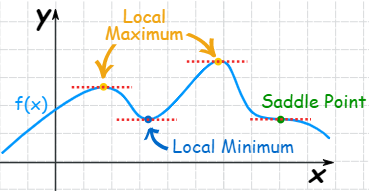

# Stochastic Gradient Descent (SGD):
SGD algorithm is an extension of the GD algorithm and it overcomes some of the disadvantages of the GD algorithm. GD algorithm has a disadvantage that it requires a lot of memory to load the entire dataset of n-points at a time to computer derivative. In the case of the SGD algorithm derivative is computed taking one point at a time.

Advantage:
Memory requirement is less compared to the GD algorithm as derivative is computed taking only 1 point at once.

Disadvantages:
The time required to complete 1 epoch is large compared to the GD algorithm.
Takes a long time to converge. May stuck at local minima.

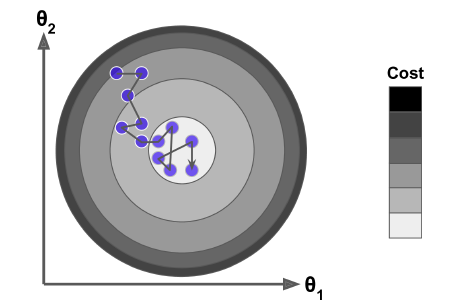


# Mini Batch Stochastic Gradient Descent (MB-SGD):
MB-SGD algorithm is an extension of the SGD algorithm and it overcomes the problem of large time complexity in the case of the SGD algorithm. MB-SGD algorithm takes a batch of points or subset of points from the dataset to compute derivate.

Advantages:
Less time complexity to converge compared to standard SGD algorithm.

Disadvantages:
The update of MB-SGD is much noisy compared to the update of the GD algorithm.
Take a longer time to converge than the GD algorithm. May get stuck at local minima.

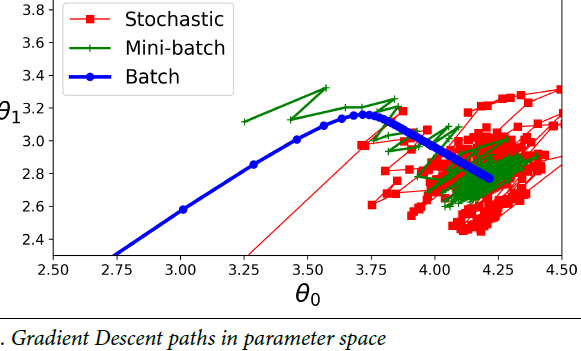

# SGD with momentum:

A major disadvantage of the MB-SGD algorithm is that updates of weight are very noisy. SGD with momentum overcomes this disadvantage by denoising the gradients. Updates of weight are dependent on noisy derivative and if we somehow denoise the derivatives then converging time will decrease.

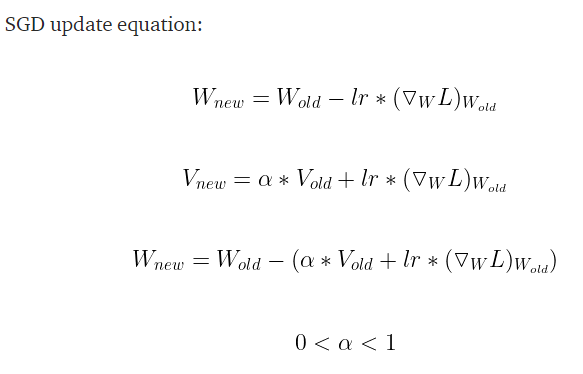

Advantages:
Has all advantages of the SGD algorithm.
Converges faster than the GD algorithm.

Disadvantages:
We need to compute one more variable for each update.

# Nesterov Accelerated Gradient (NAG):
The idea of the NAG algorithm is very similar to SGD with momentum with a slight variant. In the case of SGD with momentum algorithm, the momentum and gradient are computed on previous updated weight.

According to the NAG algorithm firstly compute momentum V_t for point W_(t-1) and move in that direction to reach W_dash, then compute the gradient at new updated weight W_dash and again move towards the gradient (Image 6). The net movement results in the direction towards the minima.

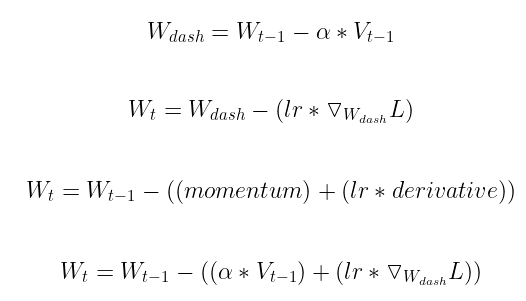

Both NAG and SGD with momentum algorithms work equally well and share the same advantages and disadvantages.



#Adaptive Gradient (AdaGrad):

For all the previously discussed algorithms the learning rate remains constant. So the key idea of AdaGrad is to have an adaptive learning rate for each of the weights. The learning rate for weight will be decreasing with the number of iteration.

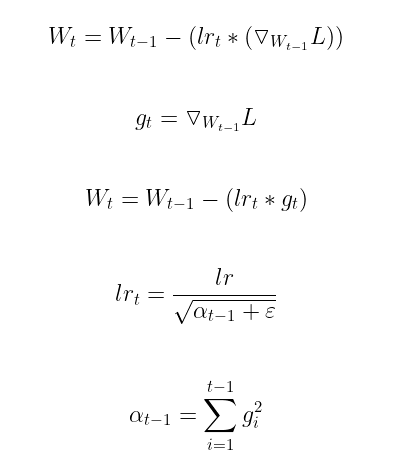

So with the increase in the number of the iteration (t) learning rate alpha increasing, which results in an adaptively decrease in the learning rate.

Advantage:
No need to update the learning rate manually as it changes adaptively with iterations.

Disadvantage:
As the number of iteration becomes very large learning rate decreases to a very small number which leads to slow convergence.

#AdaDelta:

Problem with previous algorithm AdaGrad was learning rate becomes very small with a large number of iterations which lead to slow convergence. To avoid this, the AdaDelta algorithm has an idea to take an exponentially decaying average.

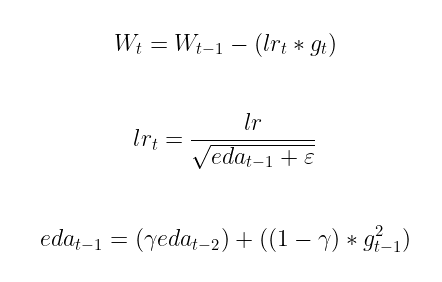



#Adam:
In the case of the AdaDelta algorithm, we were storing exponential decaying averages of the square of gradients to modify the learning rate. For Adam optimizer, the idea is to store both 1st order of moment (g_t) and 2nd order moment of the gradient (square of g_t).
EDA for 1st order moment:

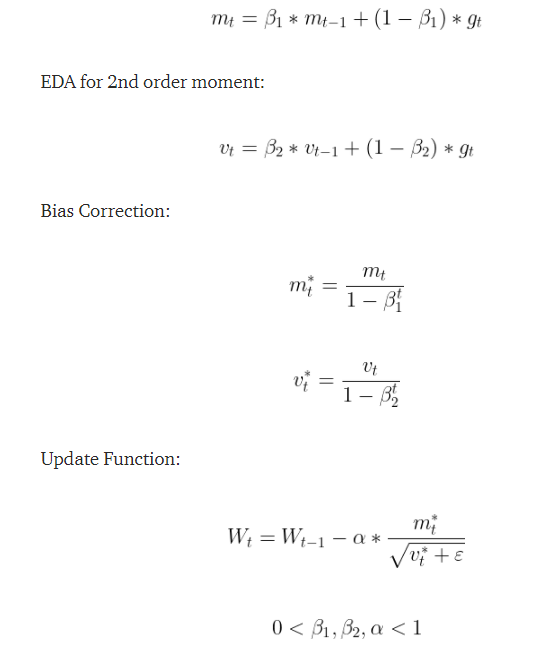



# Conclusion and Comparison of Optimizers:

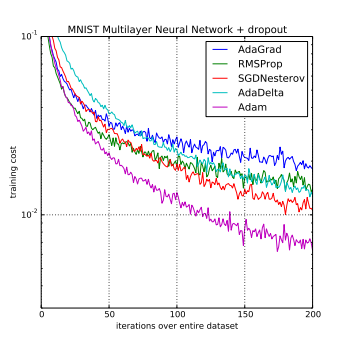

* SGD algorithm can only be used for shallow networks.
* All the other algorithms except SGD finally converges one after the other, AdaDelta being the fastest followed by momentum algorithms.
* AdaGrad and AdaDelta algorithm can be used for sparse data.
* Momentum and NAG work well for most cases but is slower.
* Adam is the fastest algorithm to converge to minima.
* Adam is considered the best algorithm amongst all the algorithms discussed above.